### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [78]:
import tensorflow as tf
tf.random.set_seed(42)

In [79]:
tf.__version__

'2.0.0'

### Collect Data

In [80]:
import keras

In [81]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [82]:
import numpy as np
print ('shape of trainX',trainX.shape)
print ('shape of testX',testX.shape)
print ('shape of trainY',trainY.shape)
print ('shape of testY',testY.shape)
print ('number of unique entries in lable column ',np.unique(testY, axis=0))

shape of trainX (60000, 28, 28)
shape of testX (10000, 28, 28)
shape of trainY (60000,)
shape of testY (10000,)
number of unique entries in lable column  [0 1 2 3 4 5 6 7 8 9]


In [83]:
print(testY[0:5])
lables = trainY

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [84]:
testY = tf.keras.utils.to_categorical(testY)

In [85]:
trainY = tf.keras.utils.to_categorical(trainY)

In [86]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

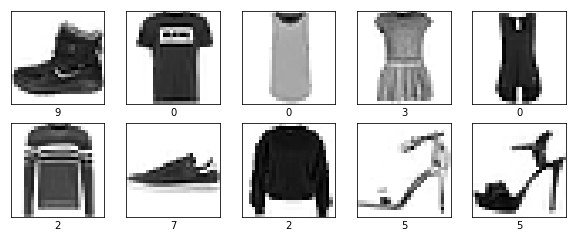

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(lables[i])
plt.show()

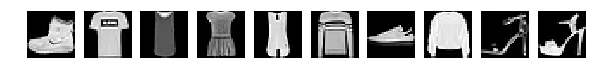

label for each of the above image:
9 0 0 3 0 2 7 2 5 5


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [94]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

# Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [95]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 201s 3ms/sample - loss: 6116.8754 - accuracy: 0.7384 - val_loss: 3333.0175 - val_accuracy: 0.8039
Epoch 2/30
60000/60000 [==============================] - 202s 3ms/sample - loss: 4851.9804 - accuracy: 0.7783 - val_loss: 6397.9630 - val_accuracy: 0.6825
Epoch 3/30
60000/60000 [==============================] - 201s 3ms/sample - loss: 4597.7371 - accuracy: 0.7864 - val_loss: 5728.1996 - val_accuracy: 0.7933
Epoch 4/30
60000/60000 [==============================] - 203s 3ms/sample - loss: 4514.9770 - accuracy: 0.7908 - val_loss: 3566.9771 - val_accuracy: 0.8016
Epoch 5/30
60000/60000 [==============================] - 201s 3ms/sample - loss: 4431.7880 - accuracy: 0.7938 - val_loss: 6794.0210 - val_accuracy: 0.7649
Epoch 6/30
60000/60000 [==============================] - 203s 3ms/sample - loss: 4518.6172 - accuracy: 0.7935 - val_loss: 3960.6801 - val_accuracy: 0.7739
Epoch 7/30
600

In [96]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [106]:
# Initialize Sequential model
model_batch_norm = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model_batch_norm.add(tf.keras.layers.Reshape((784,),input_shape=(28,28)))

# Normalize the data
model_batch_norm.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model_batch_norm.add(tf.keras.layers.Dense(10, activation='softmax'))



# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

# Compile the model
model_batch_norm.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [109]:
model_batch_norm.fit(trainX, trainY, validation_data=(testX, testY), epochs=10,batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.4202 - accuracy: 0.8558 - val_loss: 0.4806 - val_accuracy: 0.8345
Epoch 2/10
60000/60000 [==============================] - 0s 7us/sample - loss: 0.4154 - accuracy: 0.8571 - val_loss: 0.4776 - val_accuracy: 0.8356
Epoch 3/10
60000/60000 [==============================] - 0s 7us/sample - loss: 0.4124 - accuracy: 0.8583 - val_loss: 0.4756 - val_accuracy: 0.8358
Epoch 4/10
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4103 - accuracy: 0.8588 - val_loss: 0.4740 - val_accuracy: 0.8365
Epoch 5/10
60000/60000 [==============================] - 0s 7us/sample - loss: 0.4088 - accuracy: 0.8592 - val_loss: 0.4728 - val_accuracy: 0.8365
Epoch 6/10
60000/60000 [==============================] - 0s 7us/sample - loss: 0.4076 - accuracy: 0.8597 - val_loss: 0.4719 - val_accuracy: 0.8371
Epoch 7/10
60000/60000 [==============================] - 0s 

In [110]:
# serialize model to JSON
model_json = model_batch_norm.to_json()
with open("model_batch_norm.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_batch_norm.h5")
print("Saved model to disk")

Saved model to disk


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [111]:
# Initialize Sequential model
model_batch_norm_coustom_learning  = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model_batch_norm_coustom_learning.add(tf.keras.layers.Reshape((784,),input_shape=(28,28)))

# Normalize the data
model_batch_norm_coustom_learning.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model_batch_norm_coustom_learning.add(tf.keras.layers.Dense(10, activation='softmax'))


# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

# Compile the model
model_batch_norm_coustom_learning.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [115]:
model_batch_norm_coustom_learning.fit(trainX, trainY, validation_data=(testX, testY), epochs=10,batch_size = trainX.shape[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 586us/sample - loss: 0.8933 - accuracy: 0.6992 - val_loss: 0.6720 - val_accuracy: 0.7743
Epoch 2/10
60000/60000 [==============================] - 37s 620us/sample - loss: 0.6308 - accuracy: 0.7842 - val_loss: 0.6063 - val_accuracy: 0.7950
Epoch 3/10
60000/60000 [==============================] - 43s 721us/sample - loss: 0.5790 - accuracy: 0.8006 - val_loss: 0.5699 - val_accuracy: 0.8081
Epoch 4/10
60000/60000 [==============================] - 33s 556us/sample - loss: 0.5498 - accuracy: 0.8096 - val_loss: 0.5524 - val_accuracy: 0.8134
Epoch 5/10
60000/60000 [==============================] - 41s 687us/sample - loss: 0.5326 - accuracy: 0.8173 - val_loss: 0.5481 - val_accuracy: 0.8184
Epoch 6/10
60000/60000 [==============================] - 38s 637us/sample - loss: 0.5191 - accuracy: 0.8212 - val_loss: 0.5162 - val_accuracy: 0.8217
Epoch 7/10
60000/60000 [====================

In [116]:
# serialize model to JSON
model_json = model_batch_norm_coustom_learning.to_json()
with open("model_batch_norm_coustom_learning.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_batch_norm_coustom_learning.h5")
print("Saved model to disk")

Saved model to disk


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [117]:
# Initialize Sequential model
model_batch_norm_layer = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model_batch_norm_layer.add(tf.keras.layers.Reshape((784,),input_shape=(28,28)))

# Add Dense Layer which provides 100 Outputs after applying relu
model_batch_norm_layer.add(tf.keras.layers.Dense(10, activation='relu'))

# Add Dense Layer which provides 10 Outputs after applying softmax
model_batch_norm_layer.add(tf.keras.layers.Dense(10, activation='relu'))

# Normalize the data
model_batch_norm_layer.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model_batch_norm_layer.add(tf.keras.layers.Dense(10, activation='softmax'))



# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

# Compile the model
model_batch_norm_layer.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Run the model

In [120]:
model_batch_norm_layer.fit(trainX, trainY, validation_data=(testX, testY), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 187s 3ms/sample - loss: 0.8031 - accuracy: 0.7243 - val_loss: 0.5938 - val_accuracy: 0.7975
Epoch 2/10
60000/60000 [==============================] - 196s 3ms/sample - loss: 0.5353 - accuracy: 0.8160 - val_loss: 0.5014 - val_accuracy: 0.8256
Epoch 3/10
60000/60000 [==============================] - 189s 3ms/sample - loss: 0.4830 - accuracy: 0.8317 - val_loss: 0.5040 - val_accuracy: 0.8248
Epoch 4/10
60000/60000 [==============================] - 191s 3ms/sample - loss: 0.4615 - accuracy: 0.8393 - val_loss: 0.4872 - val_accuracy: 0.8304
Epoch 5/10
60000/60000 [==============================] - 191s 3ms/sample - loss: 0.4455 - accuracy: 0.8465 - val_loss: 0.5288 - val_accuracy: 0.8209
Epoch 6/10
60000/60000 [==============================] - 189s 3ms/sample - loss: 0.4376 - accuracy: 0.8462 - val_loss: 0.4726 - val_accuracy: 0.8345
Epoch 7/10
60000/60000 [==========================

In [121]:
# serialize model to JSON
model_json = model_batch_norm_layer.to_json()
with open("model_batch_norm_layer.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_batch_norm_layer.h5")
print("Saved model to disk")

Saved model to disk


## Review model